In [1]:
# IMPORT THE LIBRARY :

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

# Data Cleaning & Pre-processing

<b>Source of Dataset:</b> Kaggle.com - https://www.kaggle.com/blastchar/telco-customer-churn

In [2]:
# EXTRACT THE DATASET :
# Must be stored in same directory with the main_codes.ipynb file.

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Checking the distribution of each case in LABEL (Churn) :

shape_total = df.shape[0]
yes_case_number = df.loc[(df.Churn == 'Yes')].shape[0]
no_case_number = df.loc[(df.Churn == 'No')].shape[0]
print('The number of YES Case are:',yes_case_number,'or about', (yes_case_number/shape_total)*100,'%')
print('The number of NO Case are:',no_case_number,'or about',(no_case_number/shape_total)*100,'%')
print('\nHence, the total records in this dataset is:', shape_total)

The number of YES Case are: 1869 or about 26.536987079369588 %
The number of NO Case are: 5174 or about 73.4630129206304 %

Hence, the total records in this dataset is: 7043


In [4]:
# Checking the data types:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Preparing the data into trainable datasets:

data = df

# LABEL ENCODE THE CATEGORICAL DATA:
labelencoder1 = LabelEncoder()
labelencoder2 = LabelEncoder()
labelencoder3 = LabelEncoder()
labelencoder4 = LabelEncoder()
labelencoder5 = LabelEncoder()
labelencoder6 = LabelEncoder()
labelencoder7 = LabelEncoder()
labelencoder8 = LabelEncoder()
labelencoder9 = LabelEncoder()
labelencoder10 = LabelEncoder()
labelencoder11 = LabelEncoder()

data['gender'] = labelencoder1.fit_transform(data['gender'])
data['MultipleLines'] = labelencoder2.fit_transform(data['MultipleLines'])
data['InternetService'] = labelencoder3.fit_transform(data['InternetService'])
data['Contract'] = labelencoder4.fit_transform(data['Contract'])
data['PaymentMethod'] = labelencoder5.fit_transform(data['PaymentMethod'])
data['OnlineSecurity'] = labelencoder6.fit_transform(data['OnlineSecurity'])
data['OnlineBackup'] = labelencoder7.fit_transform(data['OnlineBackup'])
data['TechSupport'] = labelencoder8.fit_transform(data['TechSupport'])
data['StreamingTV'] = labelencoder9.fit_transform(data['StreamingTV'])
data['StreamingMovies'] = labelencoder10.fit_transform(data['StreamingMovies'])
data['DeviceProtection'] = labelencoder11.fit_transform(data['DeviceProtection'])

data = data.drop(data[data.TotalCharges == " "].index)

data = data.replace(['Yes'],1)
data = data.replace(['No'],0)

data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1
5,9305-CDSKC,0,0,0,0,8,1,2,1,0,...,2,0,2,2,0,1,2,99.65,820.5,1
6,1452-KIOVK,1,0,0,1,22,1,2,1,0,...,0,0,2,0,0,1,1,89.10,1949.4,0
7,6713-OKOMC,0,0,0,0,10,0,1,0,2,...,0,0,0,0,0,0,3,29.75,301.9,0
8,7892-POOKP,0,0,1,0,28,1,2,1,0,...,2,2,2,2,0,1,2,104.80,3046.05,1
9,6388-TABGU,1,0,0,1,62,1,0,0,2,...,0,0,0,0,1,0,0,56.15,3487.95,0


# Data Training & Prediction Model Building

In [6]:
# Split the datasets into train and test data:

X = data.drop(['Churn'], axis=1)  # PREDICTORS
y = data['Churn']                 # LABEL

seed = 53

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = seed)

print('The X_Train size:', X_train.shape)
print('The X_Test size:', X_test.shape)

print('\nThe y_Train size:', y_train.shape,'with the distribution of Churned Case is:',
      (y_train.loc[y_train == 1].shape[0]/y_train.shape[0])*100,'%')

print('The y_Test size:', y_test.shape,'with the distribution of Churned Case is:',
      (y_test.loc[y_test == 1].shape[0]/y_test.shape[0])*100,'%')

X_train.head()

The X_Train size: (5274, 20)
The X_Test size: (1758, 20)

The y_Train size: (5274,) with the distribution of Churned Case is: 26.60219946909367 %
The y_Test size: (1758,) with the distribution of Churned Case is: 26.507394766780436 %


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1948,8183-ONMXC,0,0,0,0,2,1,0,1,0,0,0,0,0,2,0,0,2,80.75,159.45
1269,8480-PPONV,1,0,1,1,62,1,2,1,2,2,2,2,2,2,2,0,0,115.55,7159.05
7023,1035-IPQPU,0,1,1,0,63,1,2,1,0,2,2,0,2,2,0,1,2,103.50,6479.4
767,7817-OMJNA,1,0,0,0,14,1,0,2,1,1,1,1,1,1,1,0,0,20.40,275.7
290,7534-BFESC,1,1,0,0,24,1,2,1,0,0,0,0,0,0,0,1,2,76.10,1712.7


## -- Data Rebalancing (in here 'Undersampling' method is used) --
The main idea of Undersampling is to randomly delete some of data with majority label (in this case, the 'NOT-Churn' costumer is quite pretty much (~73% from total data)) so the data quantity will be equal to the other label's data.

This is quite optinal, because actually the RandomForest deals very good with the unbalanced dataset. For now, I will just rebalanced it.

In [7]:
# Resampling Data (Using Undersampling Methods)

temp_data = pd.concat([X_train, y_train], axis=1)

temp_yes = temp_data.loc[temp_data.Churn == 1]
temp_no = temp_data.loc[temp_data.Churn == 0]
temp_no_under = temp_no.sample(temp_yes.shape[0])

new_data = pd.concat([temp_no_under, temp_yes], axis=0)

new_x_train = new_data.drop(['Churn'], axis=1)
new_y_train = new_data['Churn']

print('New shape of train data:', new_x_train.shape)
print('New shape of train data:', new_y_train.shape)

New shape of train data: (2806, 20)
New shape of train data: (2806,)


In [8]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100)

new_x_train_v2 = new_x_train.drop(['customerID'], axis=1)

RF.fit(new_x_train_v2, new_y_train)

y_pred = RF.predict(X_test.drop(['customerID'], axis=1))

print("Training Successful..!")

Training Successful..!


====The Importance Feature of Logistic Reggresion Classifier====

        Features  Importance
    TotalCharges       15.60
  MonthlyCharges       15.33
          tenure       15.30
        Contract       12.23
     TechSupport        5.66
   PaymentMethod        5.12
  OnlineSecurity        5.05
 InternetService        3.45
    OnlineBackup        3.02
PaperlessBilling        2.52
DeviceProtection        2.46
          gender        2.43
   MultipleLines        2.18
         Partner        2.10
      Dependents        1.88
     StreamingTV        1.71
 StreamingMovies        1.71
   SeniorCitizen        1.60
    PhoneService        0.64


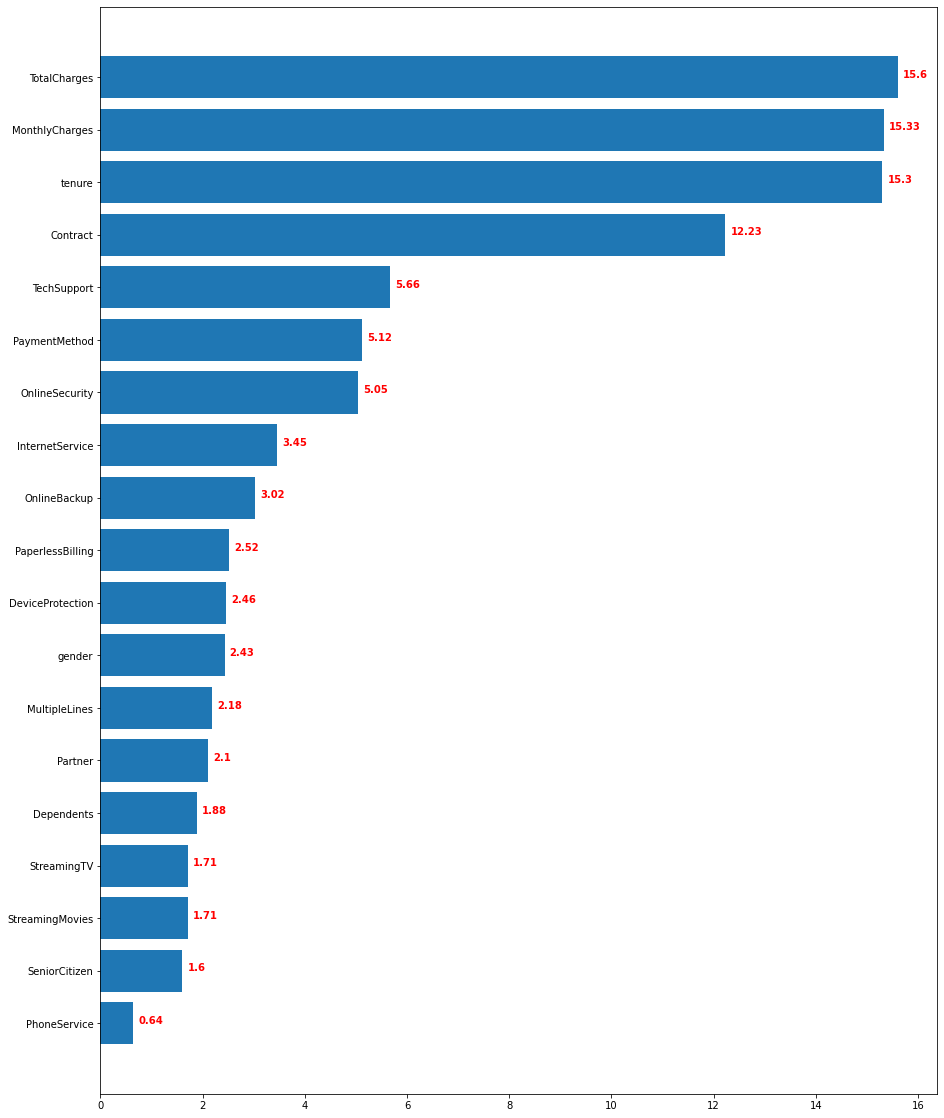

In [9]:
# Predictor/Feature Importance for Each Variable

import math

print('====The Importance Feature of Logistic Reggresion Classifier====\n')

importance = RF.feature_importances_
columns_list = new_x_train_v2.columns.values

total_weight = importance.sum()
transformed_importance = [(x/total_weight)*100 for x in importance]
transformed_importance_v2 = [round(x,2) for x in transformed_importance]

importance_df = pd.DataFrame()
importance_df['Features'] = columns_list
importance_df['Importance'] = transformed_importance_v2
importance_df.sort_values(by=['Importance'], ascending=True, inplace=True)

# summarize feature importance

print(importance_df.sort_values(by=['Importance'], ascending=False).to_string(index=False))

plt.figure(figsize=(15,20))
plt.barh(importance_df['Features'], importance_df['Importance'])
for i, v in enumerate(importance_df['Importance']):
    plt.text(v + .1, i, str(v), color='red', fontweight='bold')
plt.show()

In [10]:
# PREDICT DATA: 

print('Class dari output:',RF.classes_, 'where (0) -> NO dan (1) -> YES')

y_probability = RF.predict_proba(X_test.drop(['customerID'], axis=1))

cutoff = list(range(1, 101))
predictions = []

for i in cutoff:
    y_preds = []
    for prob in y_probability:
        if (float(prob[1]) > (i/100)):
            y_preds.append(1)
        else:
            y_preds.append(0)
            
    y_pred_df = pd.DataFrame()
    y_pred_df['Churn'] = y_preds
    predictions.append(y_pred_df)


Class dari output: [0 1] where (0) -> NO dan (1) -> YES


In [11]:
# Construct the Desicion Chart's Dataframe:

from sklearn.metrics import confusion_matrix, classification_report

precisions = []
accuracy = []
recall = []
f_score = []
number_predicted_yes = []

for i in cutoff:
    tn, fp, fn, tp = confusion_matrix(y_test, predictions[i-1]).ravel()
    accuracy.append(((tp+tn)/(tp+tn+fp+fn))*100)
    
    if tp == 0:
        precisions.append(0)
        f_score.append(0)
        recall.append(0)
    else:
        precisions.append(((tp/(tp+fp))*100))
        f_score.append((2*((tp/(tp+fn))*100)*(((tp/(tp+fp))*100)))/(((tp/(tp+fn))*100) + (((tp/(tp+fp))*100))))
        recall.append((tp/(tp+fn))*100)
    
for i in cutoff:
    u = predictions[i-1][predictions[i-1].Churn == 1].shape[0]
    number_predicted_yes.append(u)

pred_table = pd.DataFrame()

pred_table["Cutoff_Level (%)"] = cutoff
pred_table["Precision (%)"] = precisions
pred_table["Accuracy (%)"] = accuracy
pred_table["Recall (%)"] = recall
pred_table["F1-Score (%)"] = f_score
pred_table["Number_Pred_YES"] = number_predicted_yes

pred_table.head(10)

,Cutoff_Level (%),Precision (%),Accuracy (%),Recall (%),F1-Score (%),Number_Pred_YES
0,1,28.422345,33.503982,99.356223,44.200477,1629
1,2,29.259025,36.234357,99.141631,45.183374,1579
2,3,29.785853,38.054608,98.497854,45.739910,1541
3,4,30.270985,39.533561,98.283262,46.286003,1513
4,5,31.008802,41.581342,98.283262,47.143592,1477
5,6,31.604426,43.230944,98.068670,47.803347,1446
6,7,31.907433,44.141069,97.639485,48.097252,1426
7,8,32.378223,45.506257,96.995708,48.549946,1396
8,9,32.774945,46.587031,96.566524,48.939641,1373
9,10,33.136531,47.497156,96.351931,49.313564,1355


<Figure size 432x288 with 0 Axes>

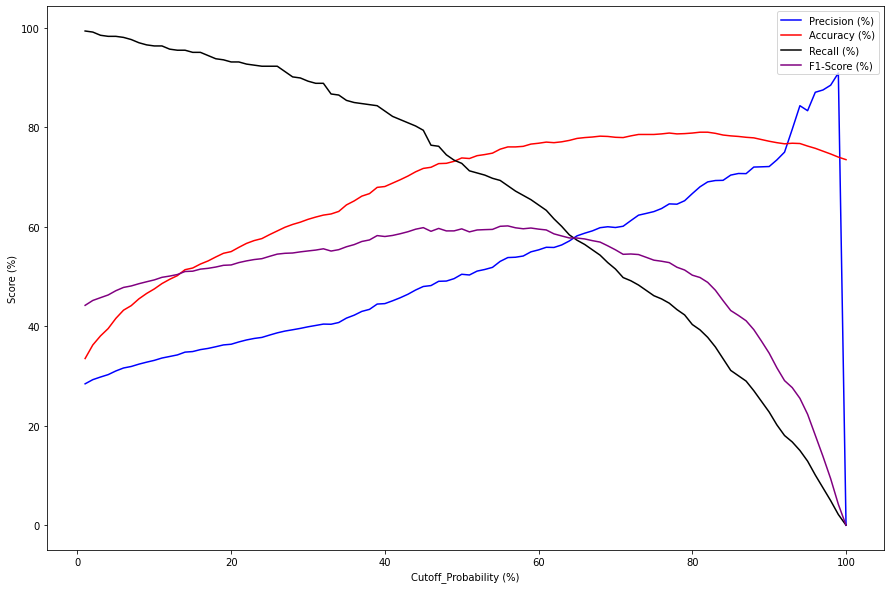

In [12]:
# Plot the Desicion Chart:

plt.clf()

list_data = [['Precision (%)', 'blue'],
             ['Accuracy (%)', 'red'],
             ['Recall (%)', 'black'],
             ['F1-Score (%)', 'purple']]

lines = []

plt.figure(figsize=[15, 10])

for data in list_data:
    line, = plt.plot(pred_table['Cutoff_Level (%)'], pred_table[data[0]], color=data[1], label=data[0])
    lines.append(line)

plt.ylabel('Score (%)')
plt.xlabel('Cutoff_Probability (%)')
plt.legend(handles=lines, loc=1)
plt.show()

In [13]:
# Save the Cuttoff sampling Result into excel file :

pred_table.to_excel('Churn_Analysis_Cutoff_Sampling.xlsx')

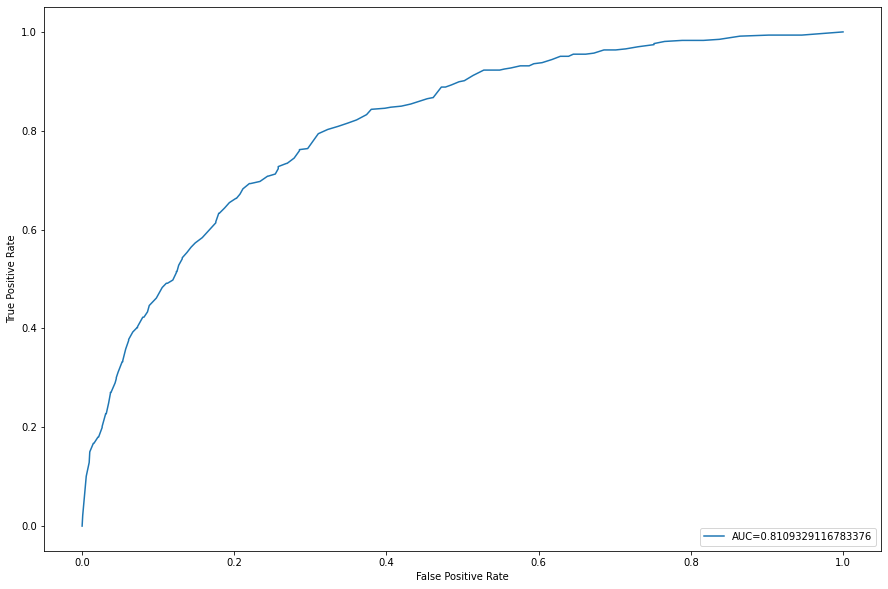

In [14]:
# Create ROC curve and AUC:

from sklearn import metrics

y_pred_proba = RF.predict_proba(X_test.drop(['customerID'], axis=1))[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=[15, 10])
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [15]:
# Sort the Precision Score by the Highest Accuracy :

sort_pred_table = pred_table.sort_values(by=["F1-Score (%)", 'Recall (%)', 'Accuracy (%)'], ascending=False)

print(sort_pred_table.drop(['Number_Pred_YES'], axis=1).head(),'\n')

chosen_cutoff = sort_pred_table.head(1)['Cutoff_Level (%)'].values

print("Therefore, the choosen cutoff_level base on 1st rank of metrics above are:", chosen_cutoff)

    Cutoff_Level (%)  Precision (%)  Accuracy (%)  Recall (%)  F1-Score (%)
55                56      53.807107     76.052332   68.240343     60.170293
54                55      53.037767     75.597270   69.313305     60.093023
44                45      47.989624     71.729238   79.399142     59.822150
56                57      53.872633     76.052332   67.167382     59.789876
58                59      54.954955     76.621160   65.450644     59.745348 

Therefore, the choosen cutoff_level base on 1st rank of metrics above are: [56]


# List all of potentially Churn Costumer from existing data.

In [16]:
# Determine the best case of model:

y_probability_arr = list(y_probability)
y_probability_list = [x[1] for x in y_probability_arr]

y_probability_df = pd.DataFrame()
y_probability_df['Churn_Prob'] = y_probability_list

# Reindex the test data :

new_x_test = X_test.reset_index()
new_x_test.drop(columns=['index'], inplace=True)

potential_churn = pd.concat([new_x_test, y_probability_df], axis=1)

potential_churn['gender'] = labelencoder1.inverse_transform(potential_churn['gender'])
potential_churn['MultipleLines'] = labelencoder2.inverse_transform(potential_churn['MultipleLines'])
potential_churn['InternetService'] = labelencoder3.inverse_transform(potential_churn['InternetService'])
potential_churn['Contract'] = labelencoder4.inverse_transform(potential_churn['Contract'])
potential_churn['PaymentMethod'] = labelencoder5.inverse_transform(potential_churn['PaymentMethod'])
potential_churn['OnlineSecurity'] = labelencoder6.inverse_transform(potential_churn['OnlineSecurity'])
potential_churn['OnlineBackup'] = labelencoder7.inverse_transform(potential_churn['OnlineBackup'])
potential_churn['TechSupport'] = labelencoder8.inverse_transform(potential_churn['TechSupport'])
potential_churn['StreamingTV'] = labelencoder9.inverse_transform(potential_churn['StreamingTV'])
potential_churn['StreamingMovies'] = labelencoder10.inverse_transform(potential_churn['StreamingMovies'])
potential_churn['DeviceProtection'] = labelencoder11.inverse_transform(potential_churn['DeviceProtection'])

potential_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn_Prob
0,9825-YCXWZ,Female,1,0,0,41,1,No,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,1,Bank transfer (automatic),101.10,4016.2,0.54
1,0306-JAELE,Male,0,0,0,5,1,No,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,1,Electronic check,96.10,453.4,0.73
2,5393-HJZSM,Female,0,1,1,32,1,No,DSL,Yes,...,Yes,Yes,No,Yes,Month-to-month,0,Bank transfer (automatic),76.30,2404.15,0.42
3,4396-KLSEH,Male,0,0,0,4,1,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,1,Electronic check,19.85,63,0.34
4,5985-BEHZK,Female,1,1,0,72,1,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,0,Credit card (automatic),105.00,7578.05,0.30


# Analyzing the important features based of the 'Feature Importance'-result before --

In [17]:
# Find the distribution of top 3 most importance categorical value:

import statistics

potential_churn['TotalCharges'] = potential_churn['TotalCharges'].astype(float)
potential_churn['MonthlyCharges'] = potential_churn['MonthlyCharges'].astype(float)
potential_churn['tenure'] = potential_churn['tenure'].astype(float)

num_feat = ['TotalCharges', 'MonthlyCharges', 'tenure']

for nums in num_feat:
    mean = statistics.mean(potential_churn[nums])
    print('The mean value of',nums,'is:',round(mean,2))

The mean value of TotalCharges is: 2309.43
The mean value of MonthlyCharges is: 65.12
The mean value of tenure is: 32.66


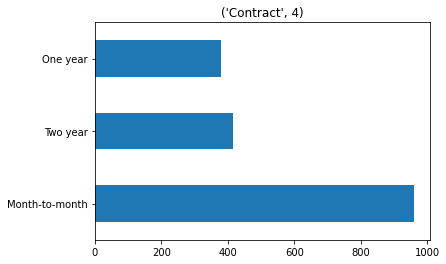

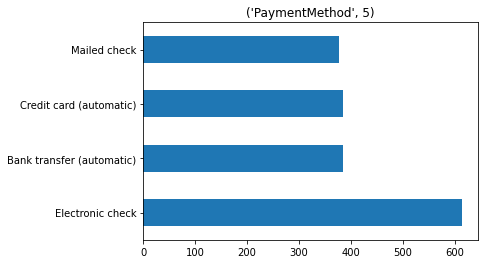

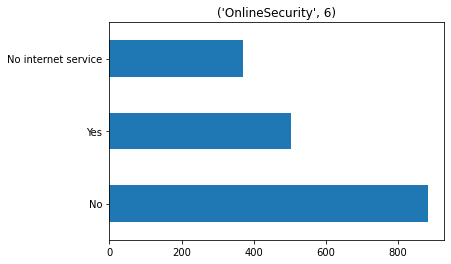

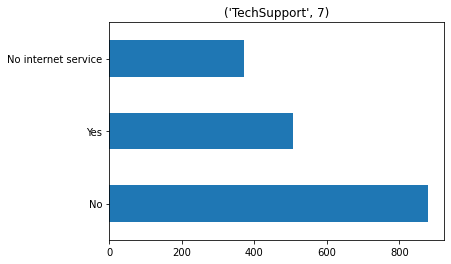

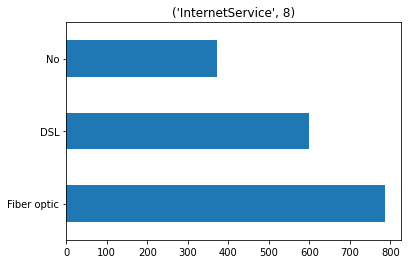

In [18]:
# Find the distribution of each 5 most importance categorical value:

feat = ['Contract', 'PaymentMethod', 'OnlineSecurity', 'TechSupport', 'InternetService']

counter_plot = []

for col in feat:
    cnt = potential_churn[col].value_counts()
    counter_plot.append(cnt)

for i, prob in enumerate(counter_plot):
    prob.plot(kind='barh')
    plt.title((feat[i],i+4))
    plt.show()
    print("==================================================================================================================")

## Final Verdict:
<p> So, we can get insights, the most high probably of churned customer are match with these criteria below:</p>
<p> - TotalCharge of <b>2309.43</b> </p>
<p> - MonthlyCharge of <b>65.12</b> </p>
<p> - Tenure of 32.68 or <b>33</b> </p>
<p> - Contract : <b>Month-to-Month</b> </p>
<p> - Payment_Method : <b>Electronic Check</b> </p>
<p> - Online_Security : <b>NO</b> </p>
<p> - Tech_Support : <b>NO</b> </p>
<p> - Internet_Service : <b>Fiber Optic</b> </p>

# Get all list of potential churn Customer ID --

In [19]:
# Save all of the list of potential churn customers to excel (based on chosen_cutoff_level = 53)

saved_cust = potential_churn.loc[potential_churn.Churn_Prob >= float(chosen_cutoff/100)]

saved_cust[['customerID', 'Churn_Prob']].to_excel('Potential_Churn_Customer_List.xlsx')

print("Done!")

Done!


In [20]:
# Some example of customers that probably will churning

saved_cust[['customerID', 'Churn_Prob']].sample(10)

,customerID,Churn_Prob
1517,5828-AVIPD,0.68
1492,1304-NECVQ,0.98
462,9809-IMGCQ,0.94
1484,5650-VDUDS,0.82
1029,0603-OLQDC,0.57
962,2070-XYMFH,0.78
585,5233-GEEAX,0.70
153,7402-EYFXX,0.90
1505,2919-HBCJO,0.88
922,4587-VVTOX,0.81


# End of Project --